# Udacity: Machine Learning Final Project 
#### by Rachel Foong

### Project Goal
The goal of this project is to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

### Dataset Exploration
Machine learning is useful to comb and refine the dataset that consists of **146 data points** with **21 features** with **18 Persons of Interest (POI)**. 

This is especially true when there are a large number of missing values represented as "NaNs" in each feature. To analyse the data, I've replaced NaNs with 0.

#### Observations
-  The loan advances, deferral_payments, director_fees and restricted_stock_deferred columns have the highest number of missing values
- Out of the set, total_payments and total_stock_value have the lowest amount of missing values

Through this simple table, it's easy to hypothesise that the POIs are essentially skewing the Max values. When we isolate the 18 POIs, we see a different story. 

POIs generally average higher in all values. It's strange to see that the Max values don't match the Max values earlier observed; which subsequently means that the outliers in the data are not all coming from POIs. 

### Outliers

When we dig deeper into the Max. values, we find that the email address which has the Max Value for total_payments is actually the "TOTAL" value for all columns. When we remove the outlier, the Max values now match the POI values and the total means are lower. 


While removing "TOTAL" helped in reconciling the differences between the POI and both POI and non-POI values, when we plot the two features for totals together, we find that there are still a couple of Outliers, especially one POI; namely **"LAY KENNETH L"**.

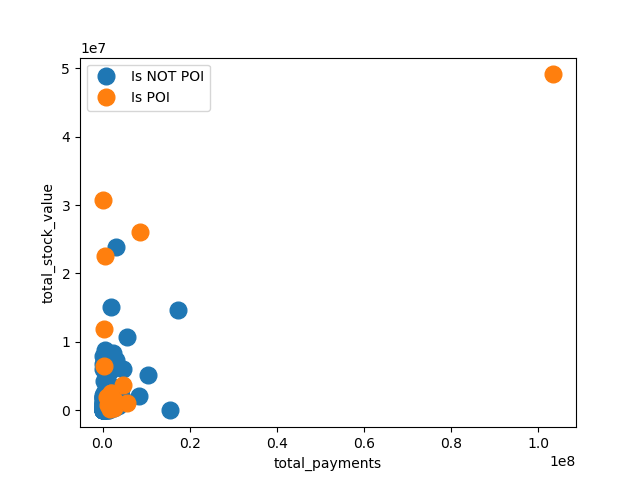

In [1]:
from IPython.display import Image
Image("Outlier1.png")

By removing "LAY KENNETH L", we get a really different look at the scatter plot and Mean/Max values. 

While there seems to be a positive correlation between the two features, we can clearly see it is weak even without calculating the correlation coeff. 

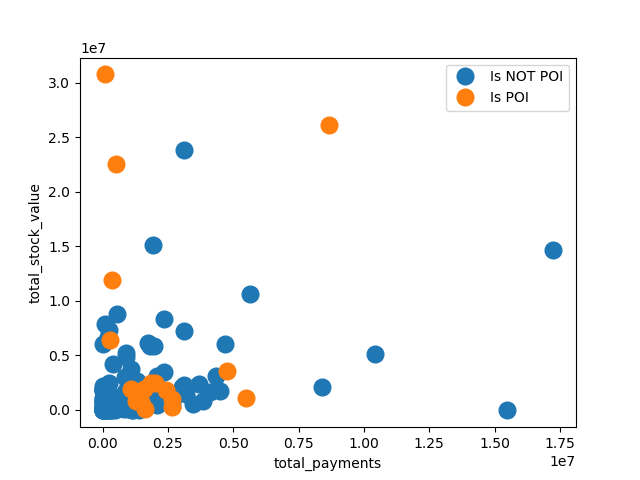

In [2]:
Image("Outlier2.png")

POI numbers without Kenneth Lay are also lower and Max. values also match the non-POI numbers. 

Now that we have cleaned up our data, we can finally move on to feature engineering. 

### Feature Engineering 

#### New Feature: % of Stock Value over Payments
At this point, while total_payments and total_stock_value have a low level of missing values and therefore one would assume a better fit for the data, it's all because these features happen to be totals of all the other features. 

However this pair makes for a good feature. When comparing averages of total stock value over payments, POI seem to have a higher total stock value per total payment ratio. We can use feature selection tools to evaluate this hypothesis. I've named the new feature "stock_value_ratio". I will test this once we've determined the best feature algorithm and parameters for the original dataset. 

#### Feature Selection
In order to better evaluate prediction of the POI by their monetary activity and attributes, I have removed all features that look at the email activity from and between poi and sender (email_address, from_messages, from_poi_to_this_person, from_this_person_to_poi, shared_receipt_with_poi). This is to also ensure the variance in the data makes sense before applying feature reduction techniques. 

After removing these features, the final feature list (without the new, untested feature) is:
- 'total_payments'
- 'total_stock_value'
- 'salary'
- 'deferral_payments'
- 'exercised_stock_options'
- 'bonus'
- 'restricted_stock'
- 'restricted_stock_deferred'
- 'expenses'
- 'loan_advances'
- 'other'
- 'director_fees'
- 'deferred_income'
- 'long_term_incentive'


By using LinearSVC as an initial classifier for comparing the two feature reduction techniques, PCA seems to works best when the number of features are 10 when we get the best parameters. However, both KBest and PCA are neck to neck in terms of scores. We shall use PCA then to for feature reduction. 

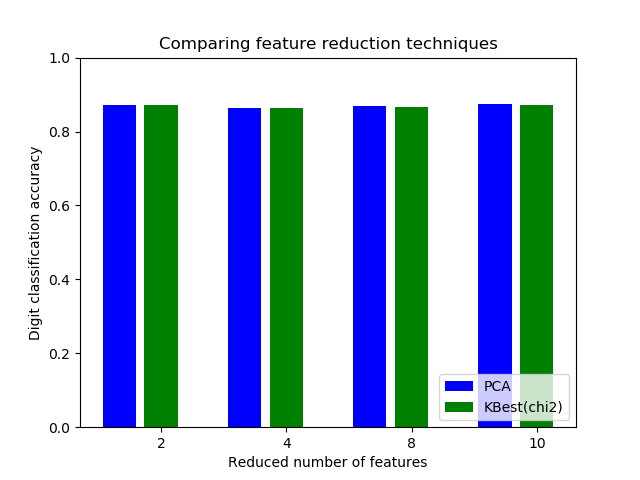

In [3]:
Image("Feature_Selection.png")

#### Feature Scaling
To see if scaling will get a better score, I have tested scaled features to get the PCA scores and also with the classifier scores. 

After scaling though, the PCA amount of variance between the variables have dropped significantly which isn't surprising given that the features are now standardized. 

### Algorithm comparison and Validation

With PCA as a means of feature selection, I chose GaussianNB algorithm and the Decision Tree algorithm as a means of validation. I validate by seeing what the **accuracy scores** are between the two models.

Comparing and validating models is important because it will then help me achieve a higher accuracy score in terms of identifying POIs.

GaussianNB seems to work best with unscaled features but Decision Tree works best with scaled features. I have decided to continue with Decision Tree given the low variance in accuracy scores between Scaled and Unscaled features.

### Parameter Tuning and Validation

In order to achieve the possibility of a higher score, it's best to tune the parameters of the algorithm. If I don't do this well, I'll miss out on that opportunity and could possibly overfit the data. 

Under the [DecisionTreeClassifier documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) there are several parameters that can be tuned. I've chosen to tune the criterion, max_depth and the splitter out of curiosity rather than focusing on the leaf nodes. 

To sync with the tester.py random state, I have left the random state at 42. 

With Grid Search CV, I found that the "entropy" criterion, mixed with the max_depth of 3 and a random splitter produced the best results.

However, with the current feature list, the score drops to 0.14. 

### Evaluation

#### Evaluating the new feature
After gaining the low score, I returned to test the new feature (stock_value_ratio) to see if it helps in gaining a higher score. I found that the score return a favourable score of 0.86.

I also find that the average precision and recall score is higher with the new feature. With the new feature, the recall score is higher than the precision score. 

The higher recall score means that whenever a POI shows up in the test set, I am able to identify him/her. The cost of this is that sometimes I get some false positives where non-POIs get flagged.

A higher precision score would mean that when a POI gets flagged in my test set, I know with confidence that it's a real POI and not a false alarm. However I would probably miss the real POIs since I'm effectively reluctant to pull the trigger on edge cases.

Looking at the classification reports below, while adding a feature does have a higher precision and recall score than not, the chances of identifying a POI also becomes low due to the smaller amount of POIs in the dataset.